## Neuropathy SHAP
----------------------------------

In [ ]:
!pip3 install pickle5

In [ ]:
import shap
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import pickle5 as pickle

In [79]:
with open(r'./pickles/neuro_all.pkl', 'rb') as handle:
    i = pickle.load(handle)
with open(r'./pickles/neuro_final_clf.pkl', 'rb') as handle:
    o = pickle.load(handle)
with open(r'./pickles/neuro_phenbin_all_model_dict.pkl', 'rb') as tmpfile:
    model_dict = pickle.load(tmpfile)

In [80]:
xtrain, xtest, ytrain, ytest = train_test_split(i, np.asarray(o), random_state=42, test_size=0.2)

In [81]:
xtrain.shape

(3405, 1821)

In [82]:
ytrain.shape

(3405,)

In [83]:
xtest.shape

(852, 1821)

In [84]:
xtrain_means = shap.kmeans(np.asarray(xtrain), 100)

In [105]:
explainer = shap.TreeExplainer(model_dict['All']['RF'], 
                               data = np.asarray(xtrain), 
                               model_output="probability")
shap_values = explainer(np.asarray(xtest))

 99%|===================| 1695/1704 [00:48<00:00]        

In [106]:
shap.initjs()

In [107]:
explainer.expected_value[0]

0.48226101764556917

In [108]:
#shap.plots.force(explainer.expected_value[0], shap_values[0])

In [109]:
#shap.plots.waterfall(explainer.expected_value[0], shap_values[0], np.asarray(xtest)[0])

In [110]:
shap_values.values[0:5,0:5,0].shape

(5, 5)

In [111]:
shap_values.values[:,:,0].shape

(852, 1821)

In [112]:
# get probabilities so we can check that the sum of SHAP makes sense
y_probs = model_dict['All']['RF'].predict_proba(xtest)

In [113]:
y_probs[0]

array([0.46992379, 0.53007621])

In [114]:
shap_values.base_values

array([[0.48226102, 0.51773898],
       [0.48226102, 0.51773898],
       [0.48226102, 0.51773898],
       ...,
       [0.48226102, 0.51773898],
       [0.48226102, 0.51773898],
       [0.48226102, 0.51773898]])

In [115]:
shap_values.base_values[0][0]+shap_values.values[0,:,0].sum()

0.4699237863771909

In [116]:
shap_values.values[0,:,1].sum()

0.012337228649024869

In [117]:
shap_values.base_values[0][1]+shap_values.values[0,:,1].sum()

0.5300762110034559

In [118]:
shap_values.values.shape

(852, 1821, 2)

In [124]:
??shap.summary_plot

Signature:
shap.summary_plot(
    shap_values,
    features=None,
    feature_names=None,
    max_display=None,
    plot_type=None,
    color=None,
    axis_color='#333333',
    title=None,
    alpha=1,
    show=True,
    sort=True,
    color_bar=True,
    plot_size='auto',
    layered_violin_max_num_bins=20,
    class_names=None,
    class_inds=None,
    color_bar_label='Feature value',
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7fde280fd4d0>,
    auto_size_plot=None,
    use_log_scale=False,
)
Source:   
def summary_legacy(shap_values, features=None, feature_names=None, max_display=None, plot_type=None,
                 color=None, axis_color="#333333", title=None, alpha=1, show=True, sort=True,
                 color_bar=True, plot_size="auto", layered_violin_max_num_bins=20, class_names=None,
                 class_inds=None,
                 color_bar_label=labels["FEATURE_VALUE"],
                 cmap=colors.red_blue,
                 # depreciated
         

<function matplotlib.pyplot.show(close=None, block=None)>

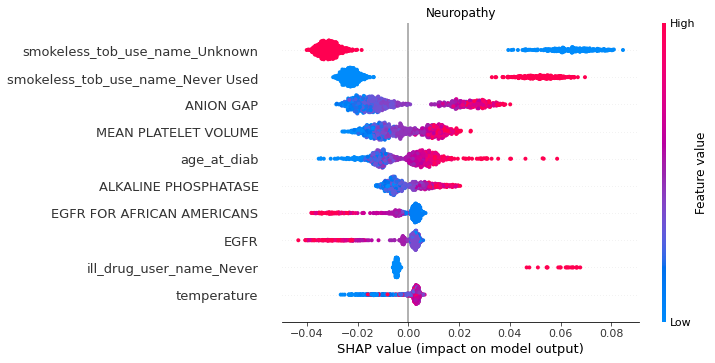

In [132]:
shap.summary_plot(shap_values.values[:,:,1], feature_names=xtrain.columns, features=xtest, 
                  max_display=10, show=False)
plt.title("Neuropathy")
plt.savefig(r'./figures/neuro10-shap.svg', bbox_inches='tight', format='svg')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

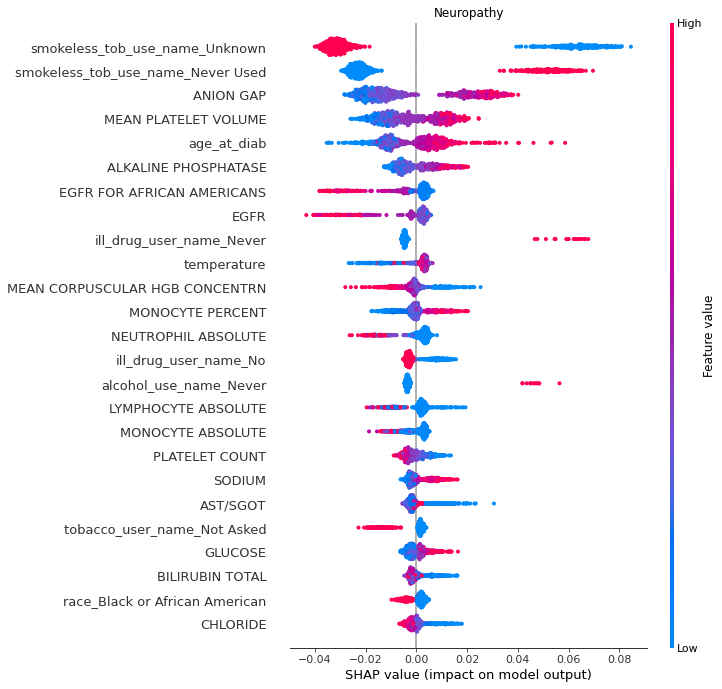

In [133]:
shap.summary_plot(shap_values.values[:,:,1], feature_names=xtrain.columns, features=xtest, 
                  max_display=25, show=False)
plt.title("Neuropathy")
plt.savefig(r'./figures/neuro25-shap.svg', bbox_inches='tight', format='svg')
plt.show